In [93]:
import numpy as np 
from sklearn.metrics import ndcg_score, dcg_score

import random 
import matplotlib.pyplot as plt 

## Discounted Cumulative Gain 

    - used for tasks with graded relevance 
    - true score 'y' of document 'd' is discrete value in scale 
        - measuring relevance with respect to query 'q' 
        - 0: bad
        - 1: fair
        - 2: good 
        - 3: excellent
        - 4: perfect 

suppose a query 'q' generates document as: 

D = $ { \{d_1, d_2, ....,d_n\} } $

$ Gain = 2^{y_k} -1 $

$ Discount, \large  D_k = \frac{1}{log_2(k+1)} $

    - penalizes the document that are retrieved with lower rank 
    - top ranks are more relevant

$ \large DCG = \sum\limits_{k=1}^{n} {G_kD_k}  $

In [76]:
np.random.seed(32)
n_items = 10
relevance_scores = np.random.randint(1,6,size=n_items)
relevance_scores.shape 
random.shuffle(relevance_scores)
print(relevance_scores)

[5 1 5 2 2 4 4 5 4 3]


In [77]:
ideal_ranking= np.sort(relevance_scores)[::-1]
ideal_ranking[:3]

array([5, 5, 5])

In [78]:
def Gain(relevance):
    return 2**relevance - 1

In [79]:
def Discount(k):
    return 1/np.log2(k+1)

In [80]:
def DCG(relavance_scores, k):
    dcg_ = []
    for i, relevance  in enumerate(relavance_scores[:k]):
        # print(Discount(k), Gain(relevance))
        # dcg_.append((Discount(k)*Gain(relevance)))
        dcg_.append(Gain(relevance)/Discount(i+1))
    return np.sum(dcg_) 

In [81]:
def NDCG(relevance_scores, ideal_scores, k):
    dcg = np.array(DCG(relevance_scores, k))
    idcg = np.array(DCG(ideal_scores,k))
    print(f'DCG:{dcg}')
    print(f'IDCG:{idcg}')
    return dcg/idcg 

In [82]:
# Compute DCG, IDCG, and NDCG
k=4
dcg = DCG(relevance_scores, k)
idcg = DCG(ideal_ranking, k)
ndcg = NDCG(relevance_scores, ideal_ranking, k)

# Print the results
print(f"Relevance Scores: {relevance_scores}")
print(f"Ideal Ranking: {ideal_ranking}")
print(f"DCG: {dcg}")
print(f"IDCG: {idcg}")
print(f"NDCG: {ndcg}")

DCG:101.55074678538325
IDCG:176.96275894566628
Relevance Scores: [5 1 5 2 2 4 4 5 4 3]
Ideal Ranking: [5 5 5 4 4 4 3 2 2 1]
DCG: 101.55074678538325
IDCG: 176.96275894566628
NDCG: 0.5738537723440607


In [83]:
np.array(ideal_ranking).reshape(1,-1), np.array(relevance_scores).reshape(1,-1)

(array([[5, 5, 5, 4, 4, 4, 3, 2, 2, 1]]),
 array([[5, 1, 5, 2, 2, 4, 4, 5, 4, 3]]))

In [95]:
random.shuffle(relevance_scores)
ndcg_score(y_true=np.array(ideal_ranking).reshape(1,-1), y_score= np.array(relevance_scores).reshape(1,-1))

0.8931686153535559

In [97]:
dcg_sklearn = dcg_score(y_true=np.array(relevance_scores).reshape(1,-1), y_score= np.array(relevance_scores).reshape(1,-1))
idcg_sklearn = dcg_score(y_true=np.array(ideal_ranking).reshape(1,-1), y_score= np.array(relevance_scores).reshape(1,-1))
dcg_sklearn, idcg_sklearn


(17.87164954873842, 15.962396481530698)

## naive dcg and sklearn scg produces different metrics for the same ranking order?

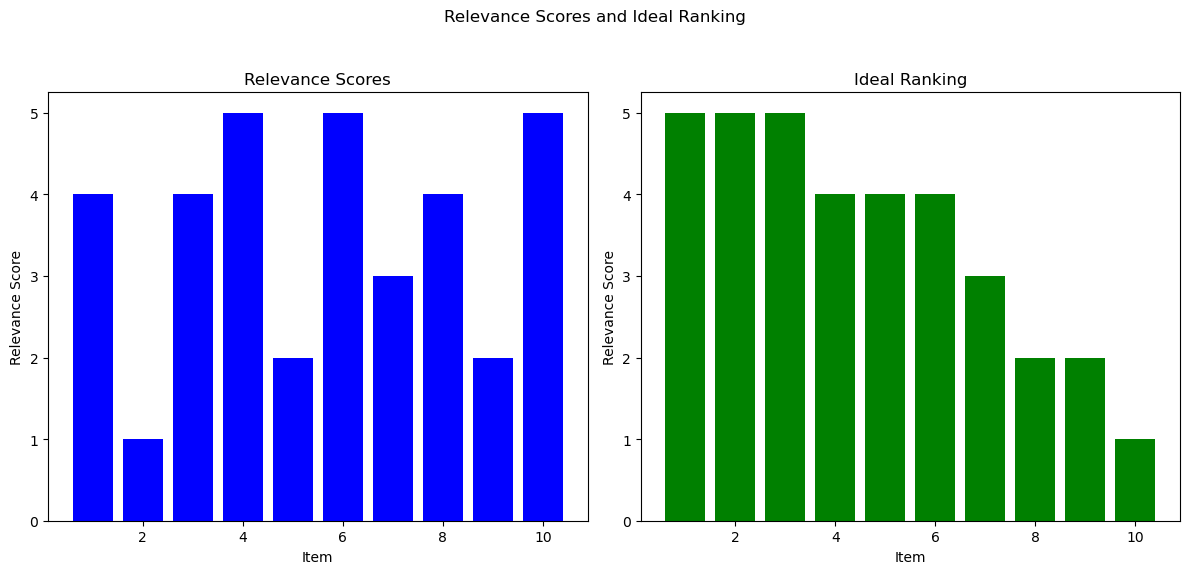

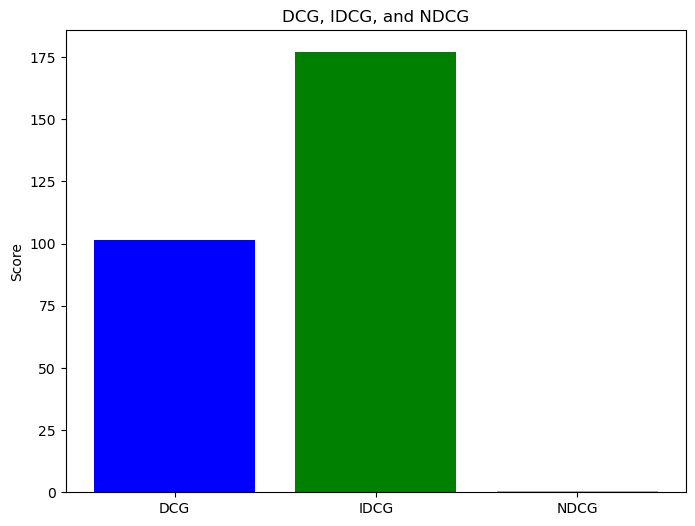

In [87]:
# Plot the relevance scores and their ideal ranking
plt.figure(figsize=(12, 6))

# Plot relevance scores
plt.subplot(1, 2, 1)
plt.bar(range(1, n_items + 1), relevance_scores, color='blue')
plt.xlabel('Item')
plt.ylabel('Relevance Score')
plt.title('Relevance Scores')

# Plot ideal ranking
plt.subplot(1, 2, 2)
plt.bar(range(1, n_items + 1), ideal_ranking, color='green')
plt.xlabel('Item')
plt.ylabel('Relevance Score')
plt.title('Ideal Ranking')

plt.suptitle('Relevance Scores and Ideal Ranking')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plot DCG, IDCG, and NDCG
labels = ['DCG', 'IDCG', 'NDCG']
values = [dcg, idcg, ndcg]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green', 'orange'])
plt.title('DCG, IDCG, and NDCG')
plt.ylabel('Score')
plt.show()

In [88]:
true_relevance = np.random.randint(1, 6, size=10)  # True relevance scores
predicted_relevance = np.random.permutation(true_relevance)

In [91]:
# Compute DCG and NDCG for the predicted relevance scores
dcg_pred = dcg_score([true_relevance], [predicted_relevance])
# dcg_true = dcg_score([i])
ndcg_pred = ndcg_score([true_relevance], [predicted_relevance])

print(f"DCG (Predicted): {dcg_pred:.2f}")
print(f"NDCG (Predicted): {ndcg_pred:.2f}")


DCG (Predicted): 13.50
NDCG (Predicted): 0.93


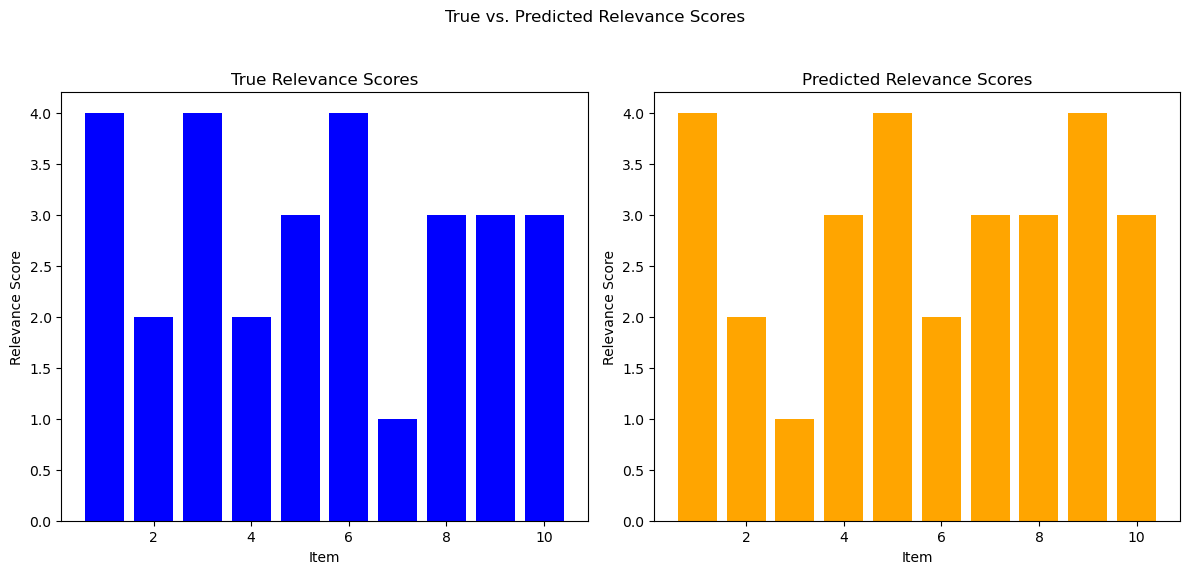

In [92]:
# Plot true and predicted relevance scores
plt.figure(figsize=(12, 6))

# True relevance scores
plt.subplot(1, 2, 1)
plt.bar(range(1, len(true_relevance) + 1), true_relevance, color='blue')
plt.xlabel('Item')
plt.ylabel('Relevance Score')
plt.title('True Relevance Scores')

# Predicted relevance scores
plt.subplot(1, 2, 2)
plt.bar(range(1, len(predicted_relevance) + 1), predicted_relevance, color='orange')
plt.xlabel('Item')
plt.ylabel('Relevance Score')
plt.title('Predicted Relevance Scores')

plt.suptitle('True vs. Predicted Relevance Scores')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
